In [1]:
import keras
import numpy as np
import tensorflow as tf`

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = tf.image.resize(x_train, [32,32]) 
x_test = tf.image.resize(x_test, [32, 32])



# because working with np array is non-trivial
x_test = np.array(x_test)
x_train = np.array(x_train)
print(x_train.shape)
print(x_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

x_validation = x_train[50000:]
y_validation = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]

print(x_validation.shape)
print(y_validation.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 10)
(50000, 10)


In [5]:
print(y_validation[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [6]:
import matplotlib.pyplot as plt

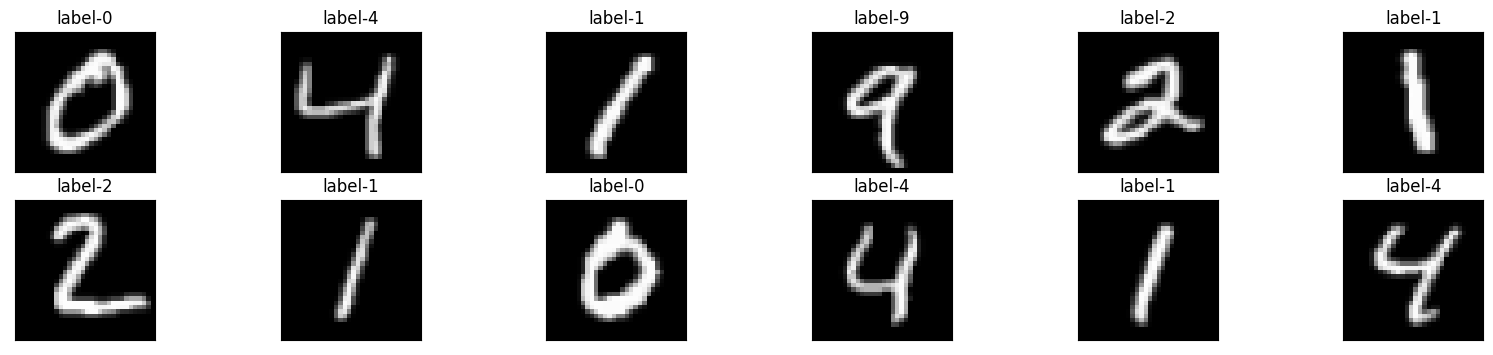

In [8]:
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.title.set_text("label-{0}".format(np.argmax(y_train[i]) ) )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+n)
    plt.imshow(x_test[i])
    plt.gray()
    ax.title.set_text("label-{0}".format(np.argmax(y_test[i]) ) )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()



In [13]:
resnet = tf.keras.applications.ResNet50(weights='imagenet',
                                       input_shape=(32, 32, 3),
                                       include_top=False)
resnet.summary()
print("Number of layers-{0}".format(len(resnet.layers)))

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [10]:
import keras 

In [14]:
resnet.trainable=False
x = resnet.layers[-1].output
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(resnet.input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

history = model.fit(x_train, y_train,
                     epochs=8,
                     batch_size=128,
                     validation_data= (x_validation, y_validation))

Epoch 1/8
391/391 [==============================] - 93s 219ms/step - loss: 1.1205 - categorical_accuracy: 0.6925 - val_loss: 0.6791 - val_categorical_accuracy: 0.8384
Epoch 2/8
391/391 [==============================] - 81s 206ms/step - loss: 0.6291 - categorical_accuracy: 0.8278 - val_loss: 0.5175 - val_categorical_accuracy: 0.8650
Epoch 3/8
391/391 [==============================] - 79s 201ms/step - loss: 0.5061 - categorical_accuracy: 0.8586 - val_loss: 0.4263 - val_categorical_accuracy: 0.8879
Epoch 4/8
391/391 [==============================] - 79s 202ms/step - loss: 0.4429 - categorical_accuracy: 0.8733 - val_loss: 0.3864 - val_categorical_accuracy: 0.8950
Epoch 5/8
391/391 [==============================] - 79s 202ms/step - loss: 0.4017 - categorical_accuracy: 0.8846 - val_loss: 0.3469 - val_categorical_accuracy: 0.9060
Epoch 6/8
391/391 [==============================] - 80s 203ms/step - loss: 0.3705 - categorical_accuracy: 0.8928 - val_loss: 0.3200 - val_categorical_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 28s 85ms/step - loss: 0.2870 - categorical_accuracy: 0.9185
Accuracy: 0.9185000061988831
Loss:  0.2870120108127594


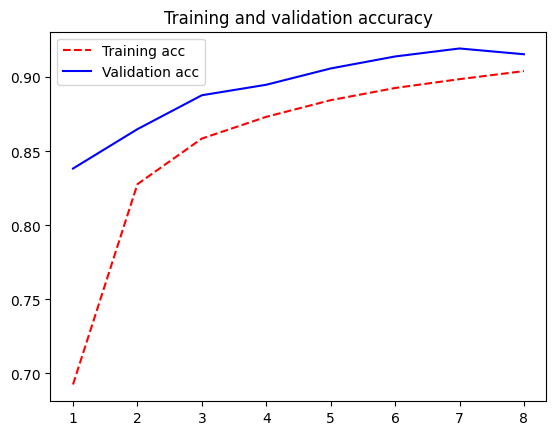

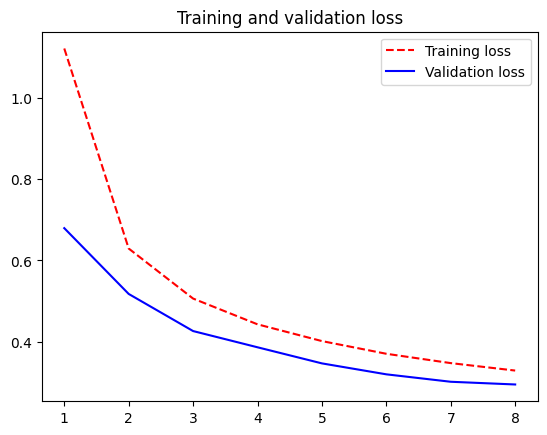

In [18]:
import matplotlib.pyplot as plt
def plot_accuracy_and_loss(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

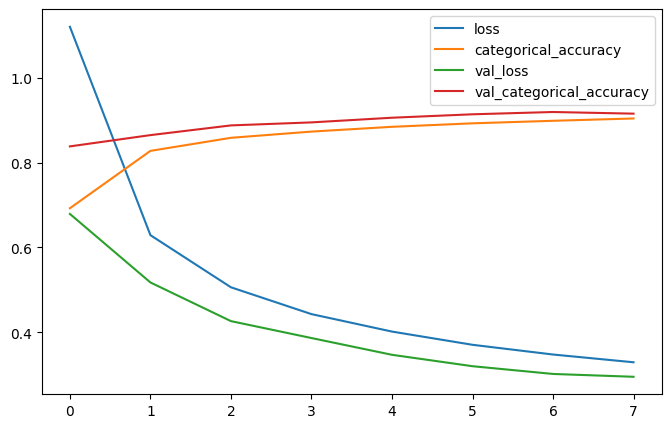

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

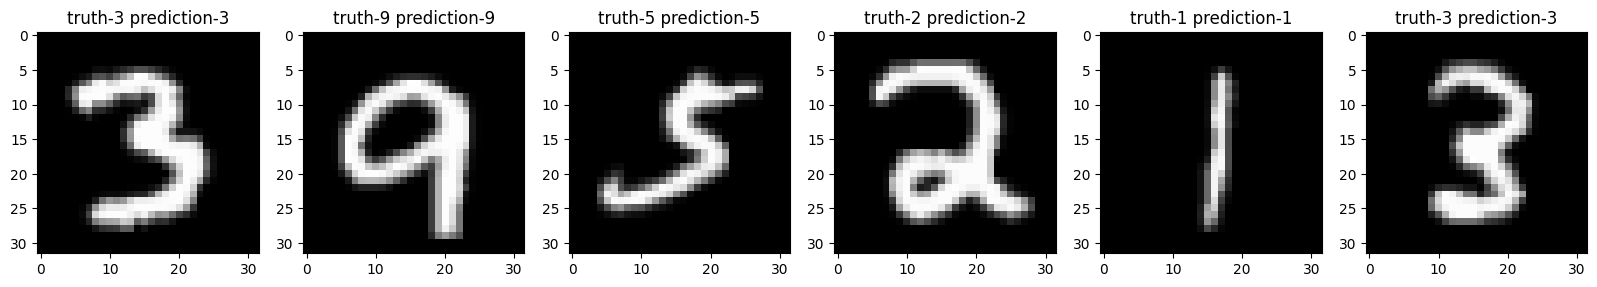

In [24]:
# prediction from trained model
predictions = model.predict(x_test)
start = 500
n = 6
plt.figure(figsize=(20, 4))
for i in range(start, start+n):
    ax = plt.subplot(1, n, i-start+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.title.set_text("truth-{0} prediction-{1}".format(np.argmax(y_test[i]), np.argmax(predictions[i]) ) )
    
plt.show()

